In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    roc_curve,
    auc,
    recall_score,
    f1_score
)


df = pd.read_csv("Bank_Customer_Churn.csv")

# Importing libraries and loading dataset

In [2]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
df.duplicated().sum()

0

### To get an initial understanding of the dataset, I first examined the structure and content using df.head(), df.info(), and df.describe(). The dataset contains 10,000 customer records and 12 features, including both numerical and categorical variables. All columns are complete with no missing values. Summary statistics reveal that customers have a wide range of credit scores, balances, and estimated salaries. The average age is around 39, and the average customer holds approximately 1.5 products. The target variable churn is binary, indicating whether a customer left the bank (1) or stayed (0).

In [7]:
# Drop unnecessary ID column
df.drop(columns=['customer_id'], inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_21588\3600774171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set2')


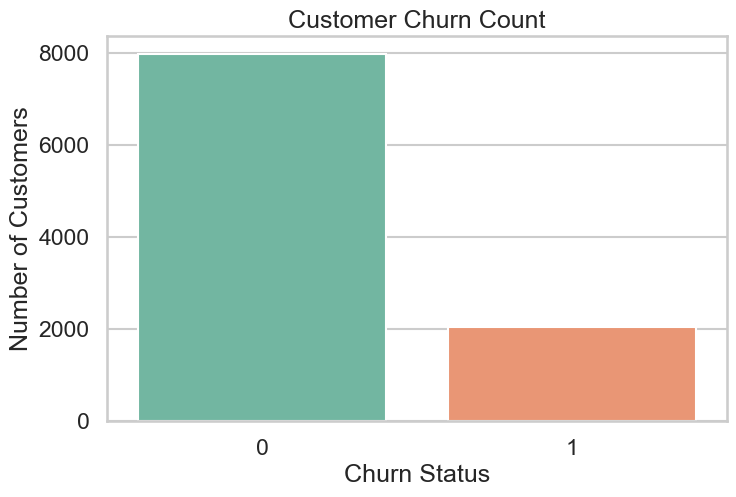

In [8]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(8,5))
sns.countplot(x='churn', data=df, palette='Set2')
plt.title("Customer Churn Count")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()

### To get a sense of the class distribution, I plotted the churn count using a bar chart. The visualization clearly shows that the dataset is imbalanced — the majority of customers did not churn. This is an important observation, as class imbalance can affect model performance and may require techniques like resampling or using evaluation metrics beyond simple accuracy.

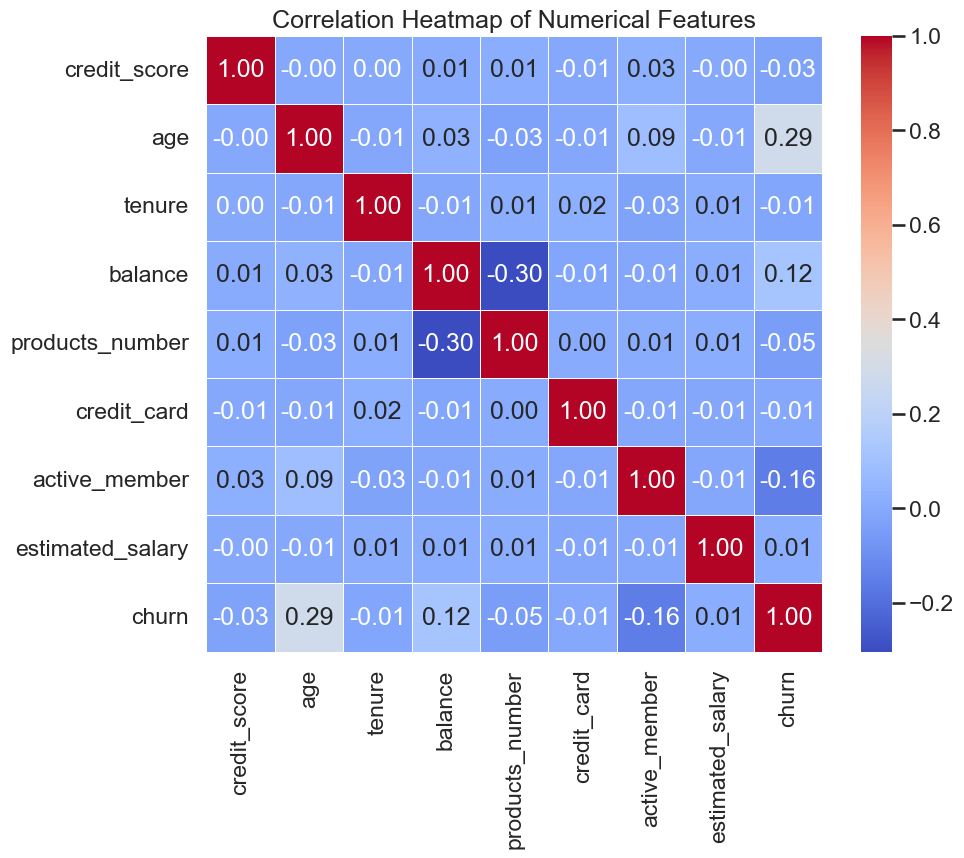

In [9]:
plt.figure(figsize=(10, 8))

# Chosing only numerical values
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


### To explore potential relationships between numerical variables, I generated a correlation heatmap. This helps identify features that are strongly correlated with each other or with the target variable churn. Most correlations appear to be weak, indicating low multicollinearity. However, features like products_number, age and balance show some noticeable patterns, which may be useful for model building or feature selection.

C:\Users\pc\AppData\Local\Temp\ipykernel_21588\259038119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


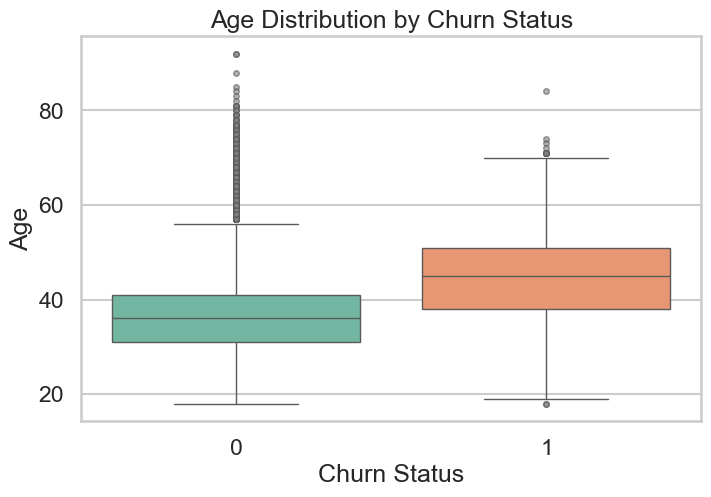

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='churn', y='age', data=df, palette='Set2',
    flierprops=dict(marker='o', markersize=4, markerfacecolor='gray', alpha=0.6)
)
plt.title("Age Distribution by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Age")
plt.show()

### To understand how age relates to churn behavior, I visualized the age distribution by churn status using a boxplot. The plot suggests that customers who churn tend to be slightly older on average, with a wider spread in ages compared to those who stayed. This could indicate that age is a relevant factor in predicting churn and should be considered during modeling.

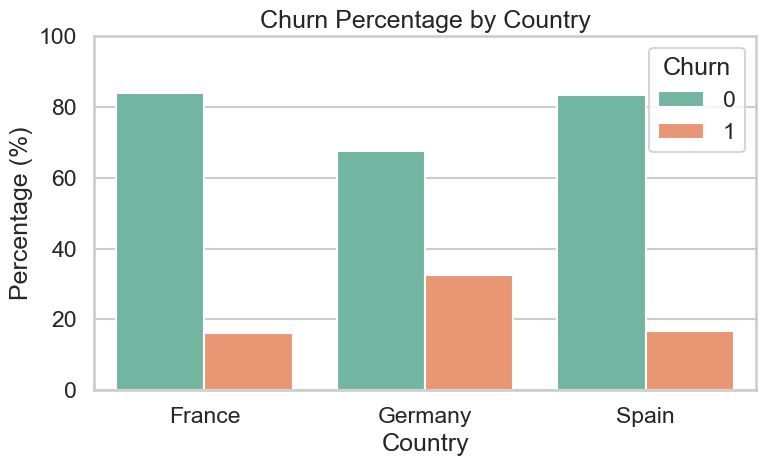

In [11]:
# Calculate churn percentages within each country
country_churn_pct = (
    df.groupby(['country', 'churn'])
      .size()
      .reset_index(name='count')
)

# Calculate the total number of customers per country
total_per_country = country_churn_pct.groupby('country')['count'].transform('sum')

# Compute percentage of churn and non-churn for each country
country_churn_pct['percent'] = country_churn_pct['count'] / total_per_country * 100

# Plot percentage-based bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='country', y='percent', hue='churn', data=country_churn_pct, palette='Set2')

plt.title('Churn Percentage by Country')
plt.ylabel('Percentage (%)')
plt.xlabel('Country')
plt.legend(title='Churn')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### I analyzed churn distribution across different countries to check for geographic patterns. The bar chart shows the percentage of customers who churned versus stayed in each country. Notably, Germany has a significantly higher churn rate compared to France and Spain, suggesting that location may play a role in customer retention and could be a valuable feature for modeling.

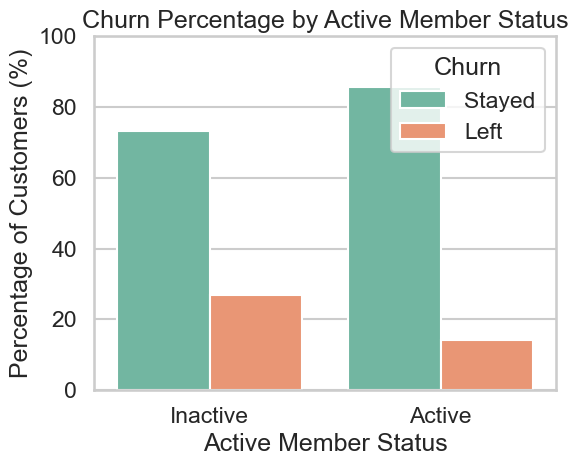

In [12]:
# Calculate churn percentage within each active_member group
active_churn_pct = (
    df.groupby(['active_member', 'churn'])
      .size()
      .reset_index(name='count')
)

# Total number of customers per active_member group
total_per_group = active_churn_pct.groupby('active_member')['count'].transform('sum')

# Calculate percentage
active_churn_pct['percent'] = active_churn_pct['count'] / total_per_group * 100

# Replace numeric labels with descriptive ones
active_churn_pct['active_member'] = active_churn_pct['active_member'].map({0: 'Inactive', 1: 'Active'})
active_churn_pct['churn'] = active_churn_pct['churn'].map({0: 'Stayed', 1: 'Left'})

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x='active_member', y='percent', hue='churn', data=active_churn_pct, palette='Set2')

plt.title('Churn Percentage by Active Member Status')
plt.ylabel('Percentage of Customers (%)')
plt.xlabel('Active Member Status')
plt.ylim(0, 100)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### I explored how customer activity level relates to churn by comparing the churn rates of active and inactive members. The visualization reveals that active customers are much more likely to stay with the bank, while inactive ones show a higher tendency to leave. This supports the idea that customer engagement plays a crucial role in retention and should be considered during feature selection and model training.


In [13]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split dataset into features and target variable
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Before training the models, I prepared the data by encoding categorical variables using one-hot encoding and dropping the first category to avoid multicollinearity. I then separated the features and the target variable (churn), followed by splitting the dataset into training and test sets with an 80/20 ratio. Finally, I applied feature scaling using StandardScaler to normalize the data, which is especially important for models sensitive to feature magnitude, such as logistic regression.

In [14]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))
print("Accuracy:", accuracy_score(y_test, log_preds))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

Logistic Regression Results:
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.811

Random Forest Results:
[[1550   57]
 [ 210  183]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.8665


### The Logistic Regression model achieved an overall accuracy of about 81%, which shows decent performance for a simple linear model. However, its recall for the churned class (customers who left) is quite low (~20%), meaning it struggles to correctly identify many of those who churned. Precision for the churn class is moderate, but the low recall indicates that the model tends to miss a large portion of churn cases, limiting its practical usefulness for churn prediction.

### On the other hand, the Random Forest classifier performed significantly better with an accuracy of around 87%. It improved both precision and recall for the churn class, achieving a more balanced F1-score (~0.58). This indicates that the model is better at detecting customers likely to churn while maintaining high performance on the majority class (customers who stayed). Overall, Random Forest appears to capture complex patterns more effectively, making it a stronger candidate for this task.

C:\Users\pc\AppData\Local\Temp\ipykernel_21588\1463577063.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='viridis')


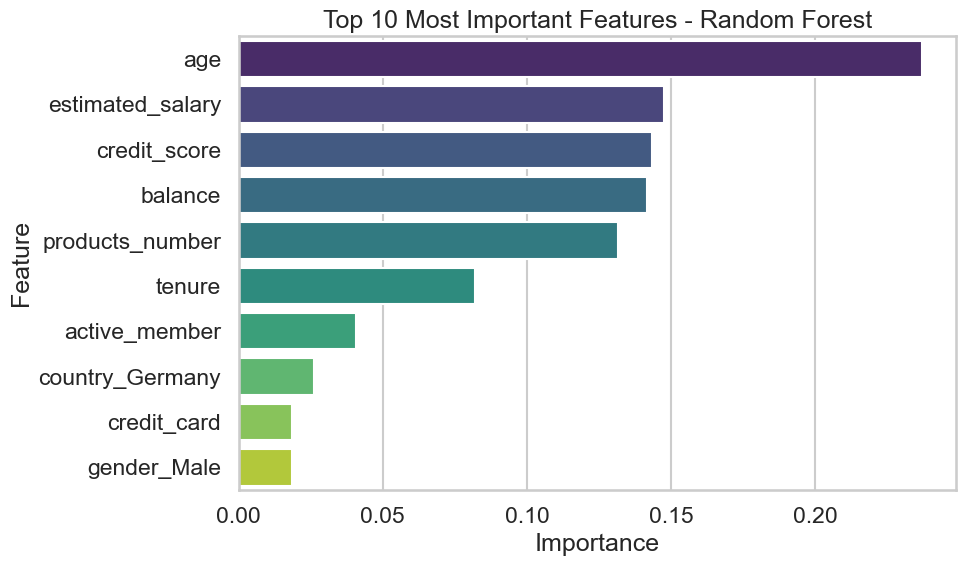

In [15]:
importances = rf_model.feature_importances_
features = X.columns

# Create DataFrame with feature importances
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features by importance
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot top 10 most important features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features - Random Forest')
plt.tight_layout()
plt.show()

### To better understand which features have the strongest influence on the Random Forest model’s predictions, I extracted and visualized the feature importances. The plot highlights the top 10 features contributing most to the model’s decisions. Notably, age stands out as the most important feature, indicating that customer age plays a significant role in churn prediction. Following that, estimated salary, credit score, and balance also have substantial impact. These insights suggest that both demographic and financial factors are key drivers of customer churn in this dataset. Understanding feature importance helps in interpreting the model and can guide further feature engineering or business strategies.

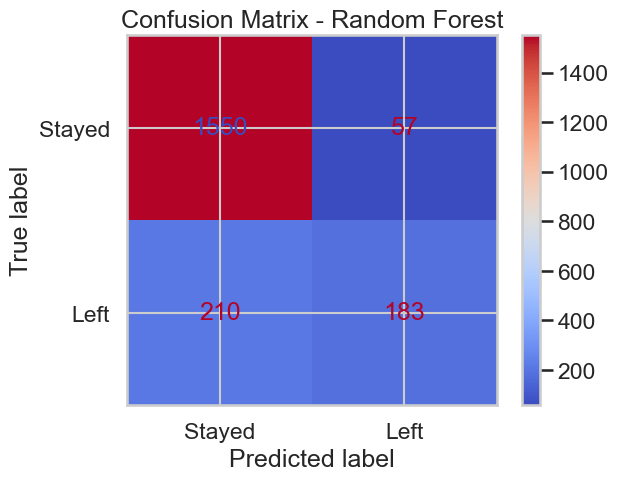

In [16]:
# Plot confusion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(
    rf_model, X_test, y_test,
    display_labels=["Stayed", "Left"],
    cmap='coolwarm'
)
plt.title("Confusion Matrix - Random Forest")
plt.show()

### This confusion matrix shows how well the Random Forest model classified customers who stayed versus those who left. It highlights the correct and incorrect predictions, giving a quick overview of the model’s performance.

In [17]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model and parameters
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy (CV):", grid_search.best_score_)

# Evaluate on test set
best_preds = best_rf.predict(X_test)
print("\nEvaluation on Test Set:")
print(classification_report(y_test, best_preds))
print("Test Accuracy:", accuracy_score(y_test, best_preds))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy (CV): 0.866

Evaluation on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Test Accuracy: 0.8705


### I performed hyperparameter tuning using GridSearchCV to find the best Random Forest settings. The process tested multiple combinations of parameters with 5-fold cross-validation, selecting the model with the highest accuracy. The best parameters improved the model slightly, reaching a test accuracy of about 87%. This tuning helps optimize the model’s performance on unseen data.

<Figure size 600x600 with 0 Axes>

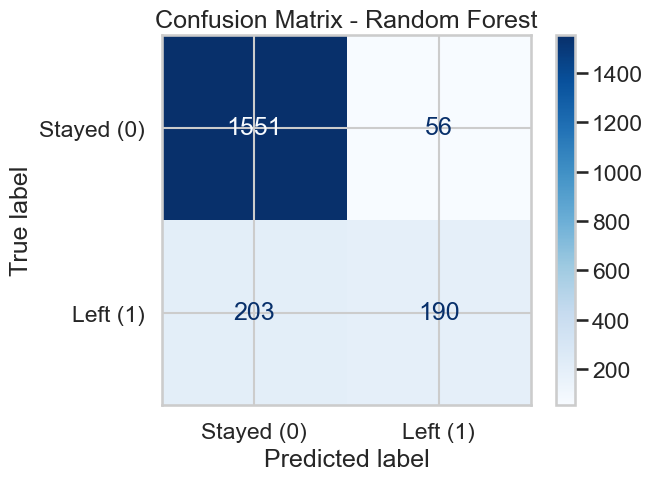

In [18]:
# Predict on test set
y_pred = best_rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Stayed (0)', 'Left (1)']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

### After applying GridSearchCV, the optimized Random Forest model showed a slight improvement in recall for the churn class. The number of correctly predicted churners (class 1) increased from 183 to 190, confirming the value of hyperparameter tuning in boosting model sensitivity to minority cases.

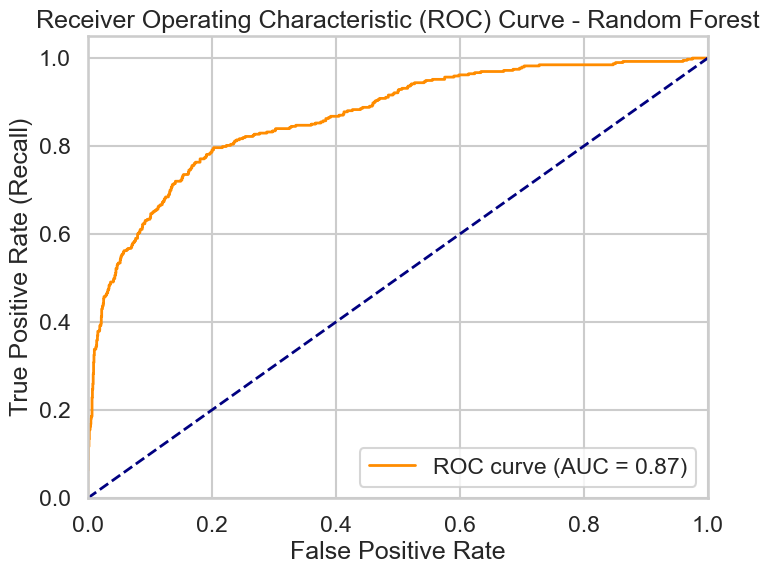

In [19]:
# Get predicted probabilities for the positive class (churn = 1)
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### The ROC curve for the optimized Random Forest model shows strong discriminative performance, staying well above the diagonal baseline. At a false positive rate of around 0.2, the true positive rate already reaches 0.8, indicating that the model effectively identifies churned customers early on. The area under the curve (AUC) confirms this with a solid value, suggesting a reliable separation between the two classes.